In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import mglearn  as mg
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [43]:
test_data = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\Life Data\test(1).csv")

In [44]:
test_data.head()

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,327,12,U,LE3,A,3,2,1,1,0,...,no,no,no,yes,yes,yes,4,4,3,18
1,328,13,R,LE3,T,1,1,2,4,0,...,yes,no,yes,yes,yes,no,5,2,3,2
2,329,13,U,GT3,T,1,1,2,2,0,...,no,no,yes,yes,yes,yes,5,4,4,0
3,330,12,U,GT3,T,2,2,1,2,0,...,yes,no,no,no,yes,yes,5,4,5,12
4,331,13,U,GT3,T,2,1,2,2,0,...,no,no,yes,yes,yes,yes,4,3,5,10


In [45]:
train_data = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\Life Data\train(1).csv")

In [46]:
train_data.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [47]:
test_data.shape, train_data.shape

((323, 21), (325, 23))

In [48]:
test_data.keys()

Index(['S/N', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'health', 'absences'],
      dtype='object')

In [49]:
categorized_data = {}
for i in test_data.keys():
    value = type(test_data[i])
    categorized_data[i] = value
    
print (categorized_data)

{'S/N': <class 'pandas.core.series.Series'>, 'Age': <class 'pandas.core.series.Series'>, 'Location': <class 'pandas.core.series.Series'>, 'famsize': <class 'pandas.core.series.Series'>, 'Pstatus': <class 'pandas.core.series.Series'>, 'Medu': <class 'pandas.core.series.Series'>, 'Fedu': <class 'pandas.core.series.Series'>, 'traveltime': <class 'pandas.core.series.Series'>, 'studytime': <class 'pandas.core.series.Series'>, 'failures': <class 'pandas.core.series.Series'>, 'schoolsup': <class 'pandas.core.series.Series'>, 'famsup': <class 'pandas.core.series.Series'>, 'paid': <class 'pandas.core.series.Series'>, 'activities': <class 'pandas.core.series.Series'>, 'nursery': <class 'pandas.core.series.Series'>, 'higher': <class 'pandas.core.series.Series'>, 'internet': <class 'pandas.core.series.Series'>, 'famrel': <class 'pandas.core.series.Series'>, 'freetime': <class 'pandas.core.series.Series'>, 'health': <class 'pandas.core.series.Series'>, 'absences': <class 'pandas.core.series.Series'

In [50]:
train_data.keys()

Index(['S/N', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
Yes_no_encoder = LabelEncoder()

In [53]:
train_data['schoolsup'] = Yes_no_encoder.fit_transform(train_data['schoolsup'].values)

In [54]:
train_data['famsup'] = Yes_no_encoder.fit_transform(train_data['famsup'].values)
train_data['paid'] = Yes_no_encoder.fit_transform(train_data['paid'].values)
train_data['activities'] = Yes_no_encoder.fit_transform(train_data['activities'].values)
train_data['nursery'] = Yes_no_encoder.fit_transform(train_data['nursery'].values)
train_data['higher'] = Yes_no_encoder.fit_transform(train_data['higher'].values)
train_data['internet'] = Yes_no_encoder.fit_transform(train_data['internet'].values)

In [55]:
train_data['Gender'] = Yes_no_encoder.fit_transform(train_data['Gender'].values)
train_data['Location'] = Yes_no_encoder.fit_transform(train_data['Location'].values)
train_data['Pstatus'] = Yes_no_encoder.fit_transform(train_data['Pstatus'].values)
train_data['famsize'] = Yes_no_encoder.fit_transform(train_data['famsize'].values)

In [56]:
categorical_list = [1,3,4,5]
train_data.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,0,13,1,0,0,4,4,2,2,...,0,0,1,1,0,4,3,3,4,22
1,2,0,12,1,0,1,1,1,1,2,...,0,0,0,1,1,5,3,3,2,31
2,3,0,10,1,1,1,1,1,1,2,...,0,0,1,1,1,4,3,3,6,37
3,4,0,10,1,0,1,4,2,1,3,...,0,1,1,1,1,3,2,5,0,42
4,5,0,11,1,0,1,3,3,1,2,...,0,0,1,1,0,4,3,5,0,37


In [57]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_list)
ohe.fit_transform(train_data).toarray()


array([[  1.,   0.,   0., ...,   3.,   4.,  22.],
       [  1.,   0.,   0., ...,   3.,   2.,  31.],
       [  1.,   0.,   0., ...,   3.,   6.,  37.],
       ..., 
       [  1.,   0.,   1., ...,   3.,   0.,  27.],
       [  0.,   1.,   0., ...,   1.,   0.,  30.],
       [  0.,   1.,   0., ...,   4.,  10.,  31.]])

In [61]:
pd.get_dummies(train_data)

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,0,13,1,0,0,4,4,2,2,...,0,0,1,1,0,4,3,3,4,22
1,2,0,12,1,0,1,1,1,1,2,...,0,0,0,1,1,5,3,3,2,31
2,3,0,10,1,1,1,1,1,1,2,...,0,0,1,1,1,4,3,3,6,37
3,4,0,10,1,0,1,4,2,1,3,...,0,1,1,1,1,3,2,5,0,42
4,5,0,11,1,0,1,3,3,1,2,...,0,0,1,1,0,4,3,5,0,37
5,6,1,11,1,1,1,4,3,1,2,...,0,1,1,1,1,5,4,5,6,37
6,7,1,11,1,1,1,2,2,1,2,...,0,0,1,1,1,4,4,3,0,38
7,8,0,12,1,0,0,4,4,2,2,...,0,0,1,1,0,4,1,1,2,36
8,9,1,10,1,1,0,3,2,1,2,...,0,0,1,1,1,4,2,1,0,48
9,10,1,10,1,0,1,3,4,1,2,...,0,1,1,1,1,5,5,5,0,37


In [62]:
from sklearn.cross_validation import train_test_split

In [64]:
new_list = []
for i in train_data.keys():
    new_list.append(i)
new_list.remove('Score')
    
print (new_list)
print (len(new_list))

['S/N', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'health', 'absences']
22


In [67]:
x = train_data[new_list]
y = train_data['Score']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 18)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()

In [74]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

In [75]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train_std = stand.fit_transform(x_train)
x_test_std = stand.fit_transform(x_test)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lr.score(x_train_std, y_train)

0.43855464987472381

In [80]:
lr.score(x_test_std, y_test)

0.25996843426773075

In [82]:
train_data.describe()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,0.473846,11.320000,0.815385,0.280000,0.876923,2.710769,2.476923,1.449231,1.956923,...,0.064615,0.526154,0.784615,0.913846,0.824615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,0.500085,1.123157,0.388584,0.449691,0.329032,1.086977,1.093015,0.725234,0.819133,...,0.246225,0.500085,0.411723,0.281024,0.380882,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,0.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,0.000000,11.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,1.000000,12.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,1.000000,17.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,32.000000,53.000000


In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 4)

In [87]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [88]:
knn.fit(x_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

In [90]:
knn.score(x_train_std, y_train)

0.52648390535399425

In [91]:
knn.score(x_test, y_test)

-0.02804231444989802

In [93]:
# to select the best n_neighbors value
n_value = 0
n_value_dict = {}
for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train_std, y_train)
    knn_train_score = knn.score(x_train_std, y_train)
    knn_test_score = knn.score(x_test_std, y_test)
    n_value_dict[i] = (knn_train_score, knn_test_score)


In [94]:
n_value_dict

{1: (1.0, -0.19153831894710538),
 2: (0.67716120082004516, -0.015387622202342133),
 3: (0.56835086279876512, 0.1424858936162402),
 4: (0.52648390535399425, 0.093789793837697588),
 5: (0.48607379061213257, 0.078903422874505469),
 6: (0.47010225058993438, 0.10266463119227931),
 7: (0.43200898286521588, 0.12837411857317704),
 8: (0.39805214893450436, 0.1712772738904067),
 9: (0.38796345422789191, 0.18142353259928101),
 10: (0.36785491986420427, 0.18805399066708584),
 11: (0.36330788680418946, 0.19929553209327422),
 12: (0.35849412982255136, 0.2051427182761959),
 13: (0.35175318589701121, 0.19359008456907356),
 14: (0.3387683555612262, 0.21966885112322454),
 15: (0.33877701497334833, 0.22425241315204802),
 16: (0.34265561880506779, 0.20994222904426285),
 17: (0.3285531759971424, 0.21119944131132096),
 18: (0.32314296575690782, 0.22125126253241578),
 19: (0.31503154670620592, 0.22873679303377814)}

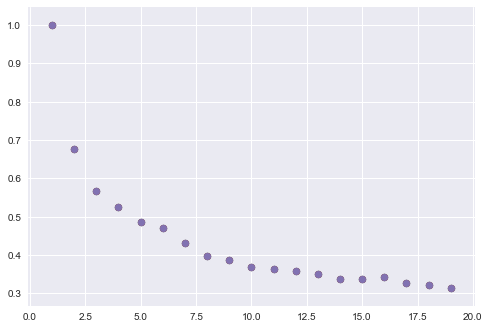

In [100]:
plt.scatter(range(1,20), [n_value_dict[i][0] for i in range(1,20)])
plt.show()

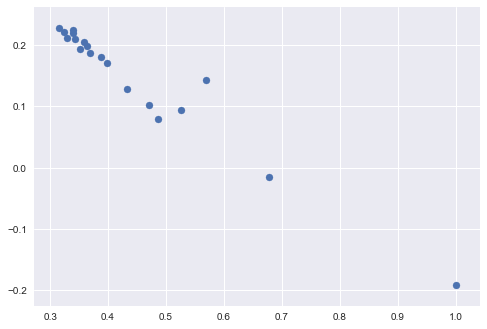

In [101]:
plt.scatter([n_value_dict[i][0] for i in range(1,20)],  [n_value_dict[i][1] for i in range(1,20)])
plt.show()

# the best n_neighbor value is 3 for this data with value 0.56 on train and 0.14 on test, therefore knn is not a good algorithm to analyze this dataset, linear regression is much better

In [102]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [103]:
dtr.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>

In [108]:
from sklearn.ensemble import RandomForestClassifier
Rand = RandomForestClassifier(n_jobs = -1)

In [110]:
feat_labels = x
Rand.fit(x_train, y_train)
importances = Rand.feature_importances_
indices = np.argsort(importances)[::-1]

In [114]:
print (indices)

[ 0 21  7 20  2 18 19  6  8  9 14 12  1 17 11 15  5  4  3 16 10 13]


In [115]:
re_arrange = []
for j in indices:
    value = x.keys()[j]
    re_arrange.append(value)

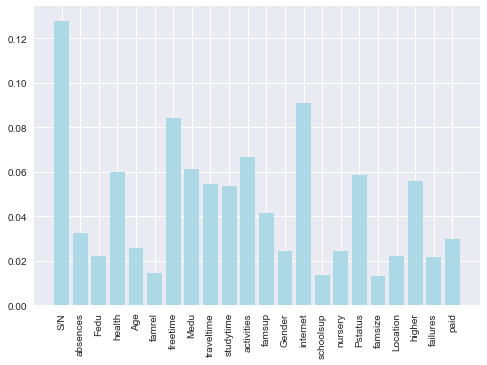

In [127]:
plt.bar(indices,importances, color = 'lightblue', align = 'center')
plt.xticks(range(22), re_arrange, rotation = 90)
plt.show()

In [129]:
retrain = train_data[['S/N', 'internet','freetime','health','Medu','activities','higher','Pstatus','traveltime','studytime']]

In [141]:
x_train,  x_test,y_train, y_test = train_test_split(retrain, y , test_size = 0.20, random_state = 18)

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scale = MinMaxScaler()

In [144]:
x_train_scale = scale.fit_transform(x_train)
y_train_scale = scale.fit_transform(y_train)

In [145]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()

In [146]:
x_train_std = standard_scale.fit_transform(x_train)
y_train_std = standard_scale.fit_transform(y_train)

In [147]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [148]:
lr.fit(x_train_std, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
lr.score(x_train_std, y_train)

0.27220541993309799

In [151]:
lr.score(x_test, y_test)

-70.522994434113329

In [152]:
from sklearn.cross_validation import cross_val_score

In [155]:
score = cross_val_score(lr, x_train_std, y_train, cv = 10)

In [156]:
score

array([-0.32535969,  0.44420705,  0.13410739,  0.1688413 , -0.43327522,
       -0.05658237,  0.17072064,  0.19012559,  0.29020393,  0.18588152])